# Examen Final Statistical Learning II

In [150]:
# Librerias que se utilizaran en el proyecto
import pandas as pd
from summarytools import dfSummary
import seaborn as sns
from sklearn.preprocessing import power_transform
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [152]:
# Cargamos la base de datos de Tarjetas
data = pd.read_csv('BankChurners.csv')

In [95]:
# Ejecutamos un describe para conocer las principales metricas de nuestra base de datos
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [153]:
# Complementamos las metricas con un "Summary", que nos devuelve la info con graficos
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CLIENTNUM[int64],Mean (sd) : 739177606.3 (36903783.5)min < med < max:708082083.0 < 717926358.0 < 828343083.0IQR (CV) : 60106762.5 (20.0),"10,127 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC40lEQVR4nO3YsW7aUBSA4XMhQdcQ7hUhJVuWbonUASkLD9AxD5tH6MDQtRm6MGWJUBAyjYOFZdyhTdWqCuBrEDnk/2aObVm/uAdMURQCvHW1fT8AsImjdR8wxkQi0gi8/qIoinngLPDHylCNMVG3271xznVCLj6bzabGmFtiRVXrvlEbzrnOYDCYe+/TMheO49gOh8POZDJpiAihopK1R7+IiPc+7fV6zwHXjwJmgP/wYwoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQ4WjfD3CIjDGRiDQCxxdFUcy3+TyHgFC3zBgTdbvdG+dcJ2R+NptNjTG3xPovQt2+hnOuMxgM5t77tMxgHMd2OBx2JpNJQ0QI9S87DTXP82MRccaY0EuoPQa992mv13suO5fnuZN3+s5W2VmoSZIcZ1n26eLiol6v10t9s7x4b8cg7+x1Owt1sVgcWWub/X4/PT8/n5adf4/HIO/sdTvfUVutVtAR+Fu01YdRYl/vrOK/FSK//u5cBs6uXFn4MXVgKvwusKenp5+9963Q+yZJ8vHk5GRUq9WysvPrVhZCPSBVdtwsy6yIXF1fX389Ozublb33/f195+7u7kO/3/9edm3ZZGUh1FdUOAbdcrk83vbzbKLKjvs7tKa1NgtZO6bTaSRSaW1ZubK86VAr/r1VZV8KPgazLLN5nl+lafpFREL3zEpCYnkJ7a3aKNQ4jm3ZCz89PVkRkSRJ7Hg8bpadf3h4aIceY1X3pZdj8PLy8lu73f5RZvbx8dGORqNmHMet8Xi8KDNb9Z1Vmd/nvTfp6yeJ80MUZUbkNQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Attrition_Flag[object],1. Existing Customer2. Attrited Customer,"8,500 (83.9%)1,627 (16.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bQWrDMBRF0adiQjORMAYvxovoYrsI7cYYa9CETNRByRL+swr3bOAHchNI8Eu9dwEOSdJd0u3qF4LLvXrvj8gD07IsXznnOfIIxtdaO1JK35HBTTnnedu2RynlGXUEYzvP87PWOu/7fpMUF5sklVKe67r+RB3Bv3CPPvARfQB4IzbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwWaS/h6eu/qF4Dqu939qrR211lmGh+cwrtbaIekVeYPBC97CBy+JKR9cXN9s4Z8ajM8y5XPMxDC+8CmfayaG8bmmfPzSBX/qwofYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAab8CkfM0G8WaZ8jpkYxsfgBTa/Cltq33c4jS0AAAAASUVORK5CYII="">",0(0.0%)
3,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 73.0IQR (CV) : 11.0 (5.8),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dPY7aQBiH8f+EDxmQbCEk6LhApBSUHCKHzRFScAJuQIe0QiC862CMU6SKBLvgj915h+fXT9bFI2RPxq9dWZYCfPftqy8AuEf3qy/AV865gaR+xeWnsizfmryeZ0eoVzjnBpPJ5Gccx+Mq6w+Hw84594tYm0Oo1/XjOB4vl8u3JEmyRxbu9/totVqNX15e+pIItSGE+o4kSbLpdPpaYemg8Yt5cjxMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJ/BdqC4qi6EmKnXNVlnPy6gpCbViapr08z3/M5/NOp9N56ECLxMmrWwi1YafTqRtF0XCxWGSz2Wz3yFpOXt1GqC0ZjUacvGpQsKHWPKEfXy6XXpPXg3qCDLXuCf08z6OiKL5nWfZbUpVfRTQsyFBV44S+JG02m/F6vR6ez+dOGxeHx4UaqqTqJ/R3ux33iZ5hwx8mECpMIFSYQKgwweuHqRp7oeyDBsbbUOvshbIPGh5vQ1WNvVD2QcPjc6iSqu2Fsg8aHh6mYAKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTvD+U8mxqzq2SAp1dRageqTu3Sgp3dhWheqTO3Cop7NlVhOqhGnOrpEBnV/EwBRMIFSYQKkxo9R6V0Y9oSmuhMvoRTWrzF5XRj2hM69tTjH78XKF+kYV91ICE/EUWQg1IyF9kIdQAhfhFFvZRYQKhwgRChQmEChM+fJhi6jN88G6oTH2GLz76RWXqM7xw1z4qU5+fg88vFrLhD0n+v1hIqJDk/4uFhIr/+Ppi4V2h7vf76NF/+Hg8RpKUpmm03W6Hn7ne6t+2et3Sv0aKouiq+j3un7Isb95y/AUcdZM5QwCg9AAAAABJRU5ErkJggg=="">",0(0.0%)
4,Gender[object],1. F2. M,"5,358 (52.9%)4,769 (47.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa5CETJRBx8GCiie7vWcFH3MxJPi5UooBCs7MrmZ26X3IH/Aspdx7H3FkfhzHrxDC0PuQs8s5r865b4J7z4cQhnme7zHGR+9jzmrbts+U0rAsy8XMiO0Nb2YWY3xM03TrfczJXXsfcHQfvQ/A/0FskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoOMN/v5+K/3IWfG86vjc85rSmkwPv77lZzzambP3nccGYOXdh

### Seleccion de variables que utilizaremos "Customer_Age", "Total_Trans_Ct", "Total_Revolving_Bal"

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

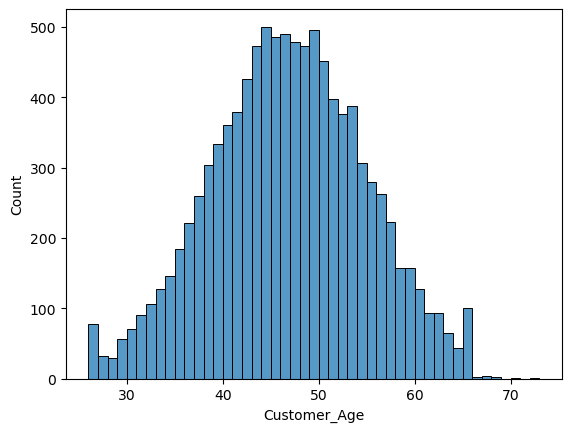

In [154]:
# Customer age, nos permitira conocer donde esta la concentracion de edades de los tarjetahabientes
sns.histplot(data = data, x='Customer_Age')

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Count'>

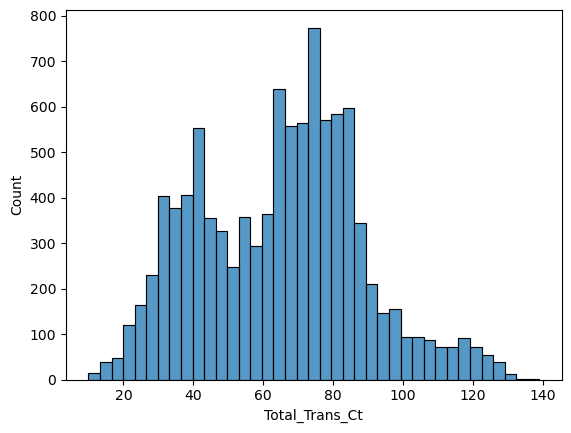

In [155]:
# Total_Trans_Ct, nos indicara cuantas transacciones en promedio ejecutan los tarjetahabientes
sns.histplot(data=data, x='Total_Trans_Ct')

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Count'>

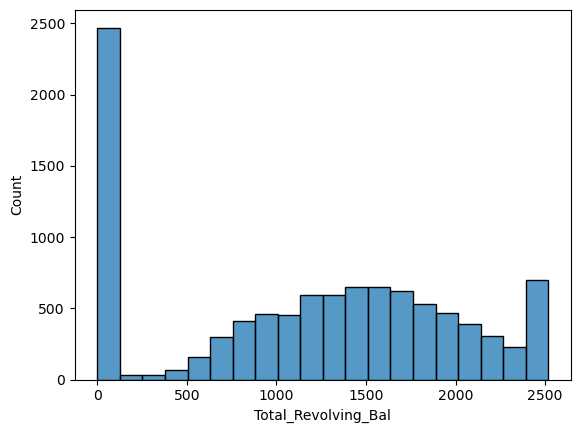

In [156]:
# Total_Revolving_Bal, nos indica cual es el saldo que los tarjetahabientes estan financiando
sns.histplot(data=data, x='Total_Revolving_Bal')

In [157]:
# Generamos un nuevo Data Frame con las columnas que son de nuestro interes
data_clean = data[['Customer_Age', 'Total_Trans_Ct', 'Total_Revolving_Bal']]
data_clean

,Customer_Age,Total_Trans_Ct,Total_Revolving_Bal
0,45,42,777
1,49,33,864
2,51,20,0
3,40,20,2517
4,40,28,0
...,...,...,...
10122,50,117,1851
10123,41,69,2186
10124,44,60,0
10125,30,62,0


<AxesSubplot:>

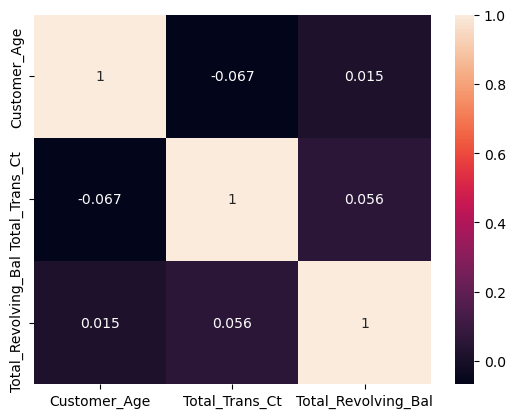

In [162]:
# Generamos un heatmap para conocer la correlacion entre nuestras columnas
sns.heatmap( data_clean[['Customer_Age', 'Total_Trans_Ct', 'Total_Revolving_Bal']].corr(),annot=True)

Método IQR

In [ ]:
# Definimos los atipicos utilizando el metodo IQR
temp = pd.DataFrame()

for col in data_clean.columns:
    column = data_clean[col]
 
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    IQR = Q3 - Q1
    
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR

    data_clean[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)


    print(f'{Q1 =} {Q3=} {IQR =} {umbral_inferior = } {umbral_superior =}')

In [171]:
# Eliminamos las filas con valores atipicos
data_noout =  data_clean[data_clean['Customer_Age_outliers'] == False]
data_noout = data_noout[data_noout['Total_Trans_Ct_outliers'] == False]
data_noout = data_noout[data_noout['Total_Revolving_Bal_outliers'] == False]
data_noout.reset_index(drop=True)

,Customer_Age,Total_Trans_Ct,Total_Revolving_Bal,Customer_Age_outliers,Total_Trans_Ct_outliers,Total_Revolving_Bal_outliers
0,45,42,777,False,False,False
1,49,33,864,False,False,False
2,51,20,0,False,False,False
3,40,20,2517,False,False,False
4,40,28,0,False,False,False
...,...,...,...,...,...,...
10118,50,117,1851,False,False,False
10119,41,69,2186,False,False,False
10120,44,60,0,False,False,False
10121,30,62,0,False,False,False


In [173]:
# Graficamos nuestras columnas nuevamente
dfSummary(data_noout)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 68.0IQR (CV) : 11.0 (5.8),43 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkElEQVR4nO3cQYriQBSA4VdjK1EhQQTdeYGBWbj0EHPYOcIsPIE3cCeIREx3MMb0ohlwwOnWpDK+V/7fvjSLHzFJ1XNVVQmg3bdHXwBwi5dHX0CInHN9EenVXH6squrN5/WEgFA9c871x+PxzziOR3XW7/f7nXPuF7H+jVD968VxPFosFm9JkuT3LEzTNFoul6PtdtsTEUK9QKgtSZIkn0wmrzWW9r1fTAC4mYIJhAoTCBUmECpMIFSYQKgwgcdT/9Dg7VJ8Pp+7vq/n2RHqFU3eLhVFEZVl+T3P898iUuc5Kq4g1Otqv11ar9ej1Wo1OJ1OnbYu7hkR6ifqvF3a7Xa8WWoBN1MwgVBhAqHCBEKFCYQKEwgVJhAqTCBUmECoMIFQYUKwr1Abnq1nB5QyQYba9Gw9O6D0CTJUabD7SYQdUBqFGqqI1D9bzw4ofYIO1aKyLLsiEjvn6n5EkLOrCFWRLMu6RVH8mM1mnU6nc/dfFpFwZ1cRqiLH4/EliqLBfD7Pp9Pp7t71Ic+uIlSFhsNh3blVIoHOruKBP0wgVJhAqDCBUGECocIEQoUJhAoTVD9HZVAZ/lAbKoPKcEltqMKgMlzQHKqIMKgMH7iZggnqf1Fxn4b7WdXuZSXUgDTdz6p5LyuhBqTJflbte1kJNUAN9rOqvQnlZgomECpMIFSYQKgwgVBhQqt3/Qwqgy+thcqgMvjU5i8qg8rgTesP/BlUZofmuVe8mYKI6J97RagQEf1zr74MlXNLz0Xr3KtPQ+XcErT46heVc0tQ4ab/qJxbwqNxMwVv2jwGQ6jwou1jMIQKL9o+BkOo8KqtYzA3hZqmaXTvtx4Oh0hEJMuyaLPZDP7neqvfbfW6m66/pa93dkyy91oOdOMAAAAASUVORK5CYII="">",0(0.0%)
2,Total_Trans_Ct[int64],Mean (sd) : 64.9 (23.4)min < med < max:10.0 < 67.0 < 134.0IQR (CV) : 36.0 (2.8),124 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACoklEQVR4nO3cQYriQBSA4VeTVqJCggi68wIDs3DpIeawc4RZeAJv4E4QiZjpYIyZxUyDDU63ViVjvcr/7YvO4kdS+l6buq4F8N2XZz8AcI+XZz9AiIwxAxHpWx4/1XX92uTzhIBQG2aMGUwmk+9Jkoxtzh8Oh70x5gexvkeozesnSTJeLpevaZoWjxzMsixerVbj3W7XFxFCvUKoLUnTtJhOp78sjg4af5gAcJmCCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQr8MvUPDoMlyeVy6TX9PF1HqDe4DJaUZRlXVfW1KIqfImLzEypuINTbrAdLNpvNeL1eD8/nc9TWw3URoX7AZrBkv98zVNICLlNQgVChAqFCBa/fUdk9whtvQ2X3CNe8DVXYPcIVn0MVEXaP8AeXKahAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBe+HUmxVVdUTkcQYY3OclWfPBBlqnue9siy/zefzKIqih0YERVh59lGQoZ5Op5c4joeLxaKYzWb7R8+z8uyfIEN9MxqNrGZZn7ny7PjKIhLoCk7QoWrj+soiEu4KTquhOi7nde5C4/rKEvIKTmuhui7ndflCY/vK8leQKzhtfqJaL+eJcKHBe62/o9ou5/E/nHCNX6agAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQrMowbGcfDa26FrQg2I6+C1z0PXhBoQl8Fr34euCTVAtoPXVVUl4um+FqFCRPzf1yJUiIj/+1qfhuqwoNe55bwQ+Lqv9WGoLgt6XV7OQ/M++0S1XtBjOa972vwO9653VJsFPZbzuqXt73C5TKERbX+He1eoWZbFj/xhEZHj8RiLiOR5Hm+32+H/PK/1b2t97uvzbfkNE7+x5o0/NZ4AAAAASUVORK5CYII="">",0(0.0%)
3,Total_Revolving_Bal[int64],Mean (sd) : 1162.7 (815.0)min < med < max:0.0 < 1276.0 < 2517.0IQR (CV) : 1427.0 (1.4),"1,974 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACs0lEQVR4nO3dPY7aQBiA4W/CggxItvgRdFxgpS2QaDhAyhw2R0hBkZob0CEhZISzFsZ4q0SKwi54xrP4c96n3jEuXoPHOxqboigEqLsvjz4B4B5Pt/7AGNMVkY7l8U9FUbxajgX++DBUY0x3NBp9C8NwYHPww+GwN8Z8J1a4uvWN2gnDcLBcLl+jKErLHDiO42C1Wg12u11HRAgVTm7+9IuIRFGUTiaTXxbH71qMAf7BZAoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChwl27+eHzOG6cLNLQzZMJ1QOH2ILhcPg1iqK+7Wc3dfNkQq2Yyy7dWZYFIvK8WCx+jsfjQ9nxTd48mVCrZ71L92azGazX614QBJnlxskiDd08mVA9sdmle7/fNzKyKjDrhwp8o77DYUIUXi6XdtXn878j1CtcJ0R5nj+nafpDRGzvM63led4WkdAYYzO8to+2CPU65wnR+Xxu+Tq59yRJ0s6y7GU2m7VarVap8xap96MtQv2AtgnR6XR6CoKgN5/P0+l0ui8ztopHWz7f8kioDdTv9z/9vWC+3/LY2FAdr24mROV5fctjI0N1vbofPSHSzNdbHhsZqjhc3SKPnRDhuqaGKiL2Vzf/IaqfRoeKchyfwXq9rydUiIj7M1jf9/WEChFxewYr4v++nlDxF9tnsL7v61k9BRUIFSoQKlSo9T0qa0LxW21D1bwmFNWrbaiidE0o/KhzqCKib00o/GAyBRUIFSoQKlQgVKhAqFDB66y/zusboYu3UOu+vhG6eAu17usboctdocZxHJQ98PF4LD3mmiRJgu1227P5bJuxruMfNVbzZ9/T1xtWxo0ZLNRuyAAAAABJRU5ErkJggg=="">",0(0.0%)
4,Customer_Age_outliers[bool],1. False,"10,123 (100.0%)",,0(0.0%)
5,Total_Trans_Ct_outliers[bool],1. False,"10,123 (1

In [174]:
# Eliminamos las columnas que no necesitamos
data_noout = data_noout[['Customer_Age', 'Total_Trans_Ct' , 'Total_Revolving_Bal']]
data_noout

,Customer_Age,Total_Trans_Ct,Total_Revolving_Bal
0,45,42,777
1,49,33,864
2,51,20,0
3,40,20,2517
4,40,28,0
...,...,...,...
10122,50,117,1851
10123,41,69,2186
10124,44,60,0
10125,30,62,0


In [175]:
# A los valores que tenemos en "cero", los sustituimos por 0.01 para poder generar Boxcox
constante = 0.01
data_noout['Total_Revolving_Bal'] = data_noout['Total_Revolving_Bal'] + constante


In [176]:
np.random.seed(10)

In [179]:
# Realizamos la transformacion BoxCox y generamos un nuevo DataFrame
lambdas = []
nombre = []
df_new = pd.DataFrame()

for x in data_noout.columns:
    df, lamb = stats.boxcox(data_noout[x])
    lambdas.append(lamb)
    nombre.append(x)
    df_new[x] = df

In [188]:
df_lambdas = {
    'nombre' : nombre,
    'lambda' : lambdas
}

df_lambdas = pd.DataFrame(df_lambdas)
df_lambdas

,nombre,lambda
0,Customer_Age,1.040938
1,Total_Trans_Ct,0.756666
2,Total_Revolving_Bal,0.284592


data_bc = power_transform(X=data_noout, method='box-cox')
data_bc = pd.DataFrame(data_bc, columns=data_noout.columns)
data_bc

In [190]:
data_bc = df_new
dfSummary(data_bc)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Customer_Age[float64],Mean (sd) : 51.1 (9.4)min < med < max:27.6 < 50.7 < 76.7IQR (CV) : 12.9 (5.5),43 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACjElEQVR4nO3cQW7aQBSA4Td1QAYkWwgJdlygUhcsOUQO2yN0wQm4ATskhIxwYmGMcwGSYM9MM2/4v/0oXvxCtfvmmbZtBQjdr59+AOARLz/9AKEyxoxEZNjz+KVt23eXz/PsCPUOY8xoNpu9Zlk27XP+dDodjTF/idUdQr1vmGXZdL1ev+d5XnU5WBRFutlspofDYSgihOoIoX4hz/NqPp+/9Tg6cv4wT46XKahAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCkxPedA0zUBEMmNMn+MMXd9BqI6VZTmo6/rPcrlMkiTpNMsqwtD1ZwjVscvl8pKm6Xi1WlWLxeLY5SxD158jVE8mkwlD1w7xMgUVCBUqECpUIFSoQKhQIdq3fstNJ9ntdhu4fB7YiTJU200ndV2nTdP8rqrqn4j0+cQEx6IMVSw2nYiI7Ha76Xa7HV+v18THw6G7WEMVkf6bTo7HIx/dAxN1qBpZDrSIRDrUQqgBsR1oEYl3qIVQA2Iz0CIS91ALoQbIYqBFJNKhFj74QwVChQqEChUIFSoQKlQgVKgQ9Ocpiwkopp8iE2yoNhNQTD/FJ9hQxWICiumn+IQcqoj0m4Bi+ik+vExBheB/UdFNrHuvCDUiMe+9ItSIxLz3ilAjFOPeK16moAKhQgVChQqEChUIFSp4fetn/xNc8RYq+5/gks9fVPY/wRnvH/zZ/6RHyOuE+J8piEj464QIFSIS/jqhb0Pl3tJzCXWd0Jehcm8JofjuF5V7SwjCQ/9G5d4SHuHzdgEvU3DC9+0CQoUTvm8XECqc8nW74KFQi6JIu/7V8/mcioiUZZnu9/vx/zyv9W9rfW7b84/09QHUj7zUR0sSPQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Total_Trans_Ct[float64],Mean (sd) : 29.3 (8.6)min < med < max:6.2 < 30.5 < 52.5IQR (CV) : 13.2 (3.4),124 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC0klEQVR4nO3dMW4aQRSH8f8EGy0gLUJIuPMFIlG49CFy2BwhhU9A68odAqG1vDYBY1I5wooVwr6dMG/0/Wqv2eIDewbmEfb7vYDUfTn3DQD/4uLcN5CjEEJPUrfh5Zv9fv/S5v3kgFBbFkLojcfjb2VZjppc//j4uAohfCfWjwi1fd2yLEe3t7cvw+FwfcqFVVUVd3d3o+Vy2ZVEqAcINZLhcLieTCbPDS7ttX4zGWAxBRcIFS7wpz8xu93uUlIZQmj6K7LcNSDUhNR1fbndbqfX19edTqdz0kLsXa67BoSakM1mc1EURf/m5mZ9dXW1OvX6nHcNCDVBg8Gg6Y6BlOmuAYspuECocIFQ4QKhwgVChQuEChcIFS4QKlwgVLhAqHCBUOECocIFQoULhAoXCBUuECpcIFS4kO0n/I1jdaRMD8l5lWWo1rE6Ur6H5LzKMlQZxupIeR+S8yrXUCWZxupImR6S84rFFFxI+hXVsCAq397eLtu+H5xPsqFaFkTb7bbY7XZf1+v1D0mN/vQbRuvwJIkg2VBlWBA9PDyMZrNZ//X1tdPkgS2jddp4kuBPKYcqqdmCaLVamRZCltE61icJPpd8qOfUZLSO9UmCz7HqhwuEChcIFS4QKlwgVLhAqHCBUOECocIFQoULhAoXCBUuECpcIFS4QKhwgY/5Zcb4pb/JzjIg1IxYv/Q35VkGhJoRy8mE1GcZRA3VOFaHQ3INGb70N9nTCdFCtY7V4ZAcDsV8RTWN1eGQHA5F/x+16VgdDsnhEIsp/Gbc2pIibm8RKiTZt7akuNtbhApJtq0tKf72FqHiA8PWlhRxe4tQ0ZqYb98SKloR++1bQkUrYr99ezRUhuniFLHevv1rqOcepgu8O/aK2i3LcjSdTtXr9X6e8osXi0Vxf3/fr6pqMJ/PN6fe2NPTUyFJdV0X8/m8/7+uPedje71v6/VVVRXHfuYXpUuuy5crXTkAAAAASUVORK5CYII="">",0(0.0%)
3,Total_Revolving_Bal[float64],Mean (sd) : 17.8 (11.9)min < med < max:-2.6 < 23.4 < 29.1IQR (CV) : 10.9 (1.5),"1,974 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAChElEQVR4nO3dP4/aMBiA8df8Uw5QIkCCjeXGSh0Y2bv2w/YjdGDozNqJDYFQELmLCCYdqpNuKRA7KXnh+e0OHh4h7MjG5HkuQN017j0B4Bate08A9WGMeRGRjscjjnmev5c1n88IFSLyN9LRaPQ9DMOB6zP2+/3OGPOjilgJFR86YRgO5vP5exRFadHBcRwHi8VisN1uOyJCqKhWFEXpeDx+cxz+UupkPmExBRX4RkVprLVtEQmNMS7DLy7ECBWlSJKknWXZ1+l02mw2m4V/415biBEqSnE8HltBEHRns1k6mUx2RcbeshAjVJSq1+u5LsYuLsSuhuq5CVzZBjCey8VQfTeBq9wAxnO59o3qvAlc9QYwnstNv1E9NoEr2wDGc2HDHyoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKnAK9cF4HMYMz+dzu+z5lIVQH4jPYcwsywJr7Zc0TX+KiOvdU5Uh1MfifBhztVoNlstl93Q6NauanA9CfUAuhzF3u12tD2KymIIKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCB49I14/m387W+7cQHodaI79/O1/22Ex+EWi/ON52I1P+2Ex+EWkOufztf99tOfLCYggqEChUIFSoQKlQgVKhAqFCB7al/8HxD1BCRs8O4h32z5OumUOM4Doo+OI7jwFrbEpHQGFN4YncWDIfDb1EU9YsOtNa2kyR57ff7vxuNRlZk7Mebpc1m86vo54qIHA6HQEQkSZJgvV53/9dY3/G39PUHwpjgIxwGSq8AAAAASUVORK5CYII="">",0(0.0%)


In [192]:
# Ajustamos el modelo de clustering y creamos las listas "inercia" y "ks"
inercia = []
ks = []

for k in range(2, 60): 
    modelo_iterado = AgglomerativeClustering(n_clusters=k)
    labels = modelo_iterado.fit_predict(data_bc)
    score = silhouette_score(data_bc, labels)
    inercia.append(score)
    ks.append(k)

codo = pd.DataFrame({'inercia': inercia, 'k': ks})

<AxesSubplot:xlabel='k', ylabel='inercia'>

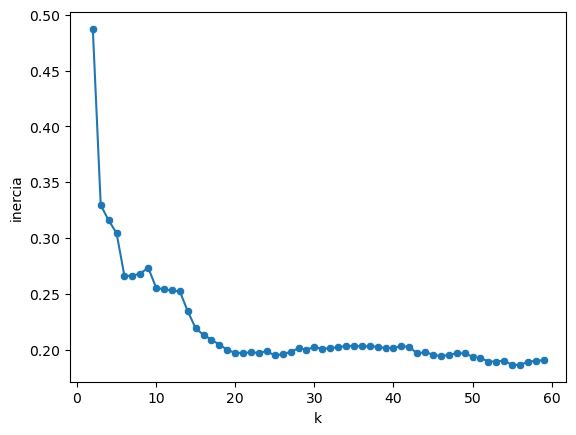

In [194]:
# Generamos el diagrama de codo
sns.scatterplot(data=codo,x='k',y='inercia',markers=True)
sns.lineplot(data=codo, x='k', y='inercia',)

In [227]:
#Definimos la cantidad de Clusters
modelo = AgglomerativeClustering(n_clusters=4)
modelo.fit(data_bc)

AgglomerativeClustering(n_clusters=4)

In [228]:
data_noout['cluster'] = modelo.labels_
data_noout

,Customer_Age,Total_Trans_Ct,Total_Revolving_Bal,cluster
0,45,42,777.01,0
1,49,33,864.01,0
2,51,20,0.01,1
3,40,20,2517.01,0
4,40,28,0.01,1
...,...,...,...,...
10122,50,117,1851.01,2
10123,41,69,2186.01,0
10124,44,60,0.01,1
10125,30,62,0.01,1


In [229]:
data_noout.groupby(by='cluster').agg(['min','mean','max'])

Customer_Age                Total_Trans_Ct                  \
                 min       mean max            min       mean  max   
cluster                                                              
0                 26  40.913064  53             10  65.088555  134   
1                 26  46.150202  65             10  61.427530  132   
2                 43  52.783548  67             44  82.587316  131   
3                 46  54.779514  68             10  37.807292   65   

        Total_Revolving_Bal                        
                        min         mean      max  
cluster                                            
0                    159.01  1525.465029  2517.01  
1                      0.01     0.010000     0.01  
2                    397.01  1537.950257  2517.01  
3                    132.01  1584.985694  2517.01

# Caracteristicas de clusters

Customer_Age
* Joven = < 35
* Adulto = > 36 < 50
* Adulto Mayor = > 50



<AxesSubplot:xlabel='Customer_Age', ylabel='Total_Trans_Ct'>

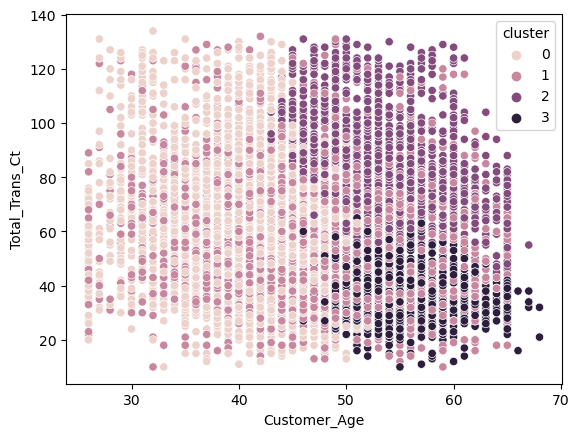

In [230]:
sns.scatterplot(data=data_noout,x='Customer_Age', y='Total_Trans_Ct', hue='cluster')

<AxesSubplot:xlabel='Customer_Age', ylabel='Total_Revolving_Bal'>

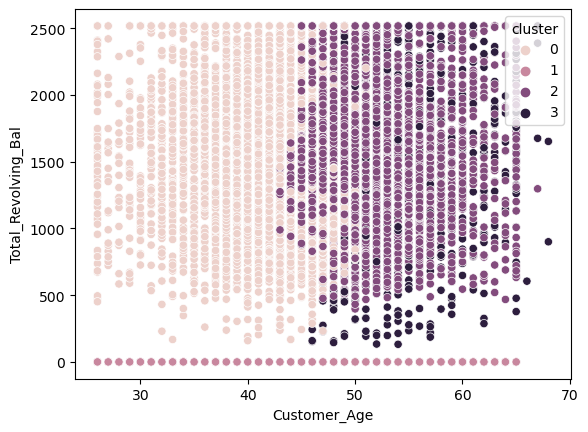

In [231]:
sns.scatterplot(data=data_noout,x='Customer_Age', y='Total_Revolving_Bal', hue='cluster')

In [232]:
import plotly.express as px

In [233]:
# Graficamos nuestro modelo
fig = px.scatter_3d(data_noout, x = 'Customer_Age',
y = 'Total_Trans_Ct',
z = 'Total_Revolving_Bal',
color = 'cluster')

fig.show()